In [5]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import torch
import os

import wandb # TODO: use this..

from nets.nets import GenericNC, BasicMLP, BasicCNN
from nets.unet import UNet
from nets.resnet import ResNetBase
from utils.utils import load_images_from_directory, plot_images

In [6]:
args = dict(
        batch=100, 
        dir_input = 'data/samples/img/',
        dir_output = 'data/samples/col/',
        out_type = 'colour',
        grayscale=False,
        
        gpu=0,
        iters=1000, 
        trials=3, 
        method='exact',
        mat_type='general',
        loss_on='second_smallest',
        net='cnn',
        size = (96,96),
        width = 50,
        laplace = None,
        lr=1e-3,
        seed = 0
    )

experiment = wandb.init(project='DDN-NC', config=args, mode='disabled', allow_val_change=True)
    # disabled and allow val changes... otherwise enable and use sweep to set different params
args = wandb.config

In [7]:
X_input = load_images_from_directory(args.dir_input, num=args.batch, size=args.size, gray=args.grayscale)
Q_true = load_images_from_directory(args.dir_output, num=args.batch, size=args.size, gray=True)

print(f'{X_input.shape} {Q_true.shape}')

torch.Size([100, 3, 96, 96]) torch.Size([100, 96, 96])


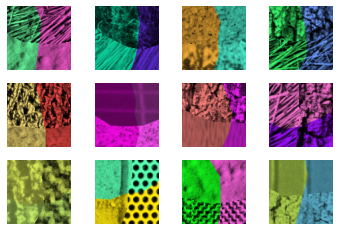

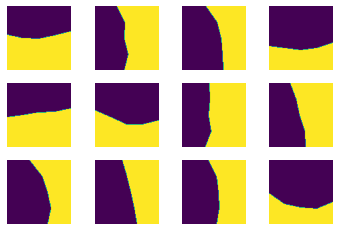

In [8]:
plot_images(X_input[:12].permute(0,2,3,1))
plot_images(Q_true[:12])